In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
med_ins=pd.read_csv('C:\\Users\\ROHAN\\OneDrive\\Desktop\\Rays Project\\Medical insurance price prediction\\data\\insurance.csv')

In [3]:
med_ins.head(10
)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
med_ins.isnull().sum()
## no  null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Checking for outliers

<Axes: >

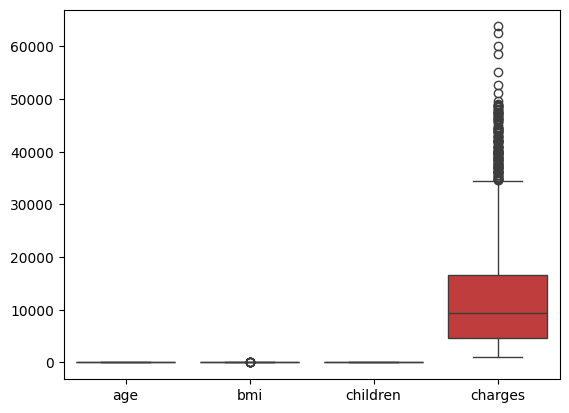

In [5]:
sns.boxplot(med_ins)

# Removing the outliers


In [6]:

Q1 = med_ins['charges'].quantile(0.25)
Q3 = med_ins['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_cleaned = med_ins[(med_ins['charges'] >= lower_bound) & (med_ins['charges'] <= upper_bound)]


<Axes: >

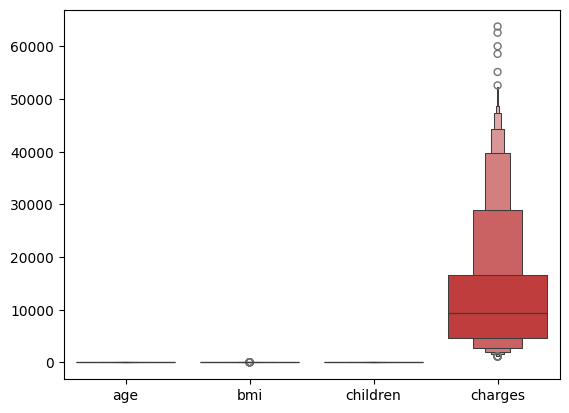

In [7]:
sns.boxenplot(med_ins)

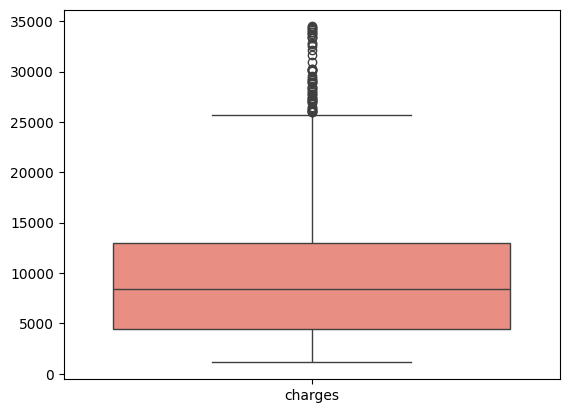

In [8]:

sns.boxplot(data=df_cleaned[['charges']], color="salmon")
plt.show()


In [9]:
print("Before:", med_ins.shape[0], "rows")
print("After :", df_cleaned.shape[0], "rows")

Before: 1338 rows
After : 1199 rows


<Axes: xlabel='charges', ylabel='Count'>

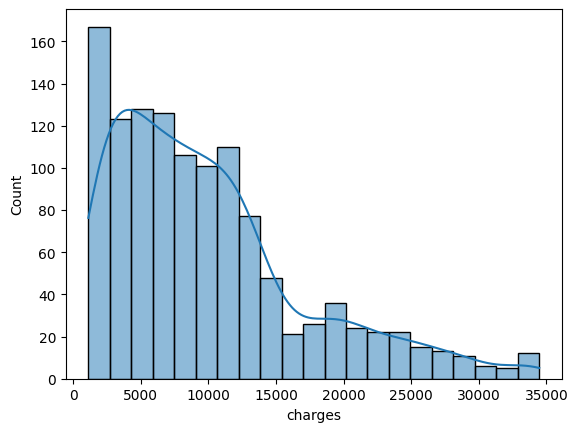

In [10]:
sns.histplot(df_cleaned['charges'], kde=True)


In [11]:
df_cleaned['charges'].skew()


np.float64(1.1784825861928256)

C:\Users\ROHAN\AppData\Local\Temp\ipykernel_22256\3533354795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['charges_log'] = np.log(df_cleaned['charges'] + 1)


<Axes: xlabel='charges_log', ylabel='Count'>

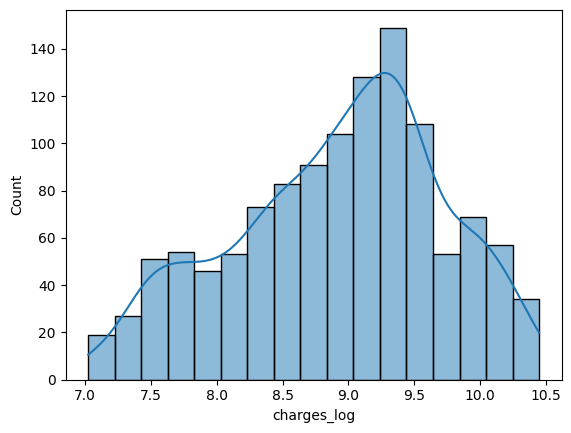

In [12]:

df_cleaned['charges_log'] = np.log(df_cleaned['charges'] + 1)


sns.histplot(df_cleaned['charges_log'], kde=True)


In [13]:
# After cleaning and log transformation
df_cleaned['charges_log'] = np.log(df_cleaned['charges'] + 1)

# 👉 ADD FEATURE ENGINEERING HERE
df_cleaned['age*bmi'] = df_cleaned['age'] * df_cleaned['bmi']
df_cleaned['is_obese'] = (df_cleaned['bmi'] > 30).astype(int)
df_cleaned['age*smoker'] = df_cleaned['age'] * (df_cleaned['smoker'] == 'yes').astype(int)

# Now split into X and y
X = df_cleaned.drop(['charges', 'charges_log'], axis=1)
y = df_cleaned['charges_log']


C:\Users\ROHAN\AppData\Local\Temp\ipykernel_22256\3511623625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['charges_log'] = np.log(df_cleaned['charges'] + 1)
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_22256\3511623625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['age*bmi'] = df_cleaned['age'] * df_cleaned['bmi']
C:\Users\ROHAN\AppData\Local\Temp\ipykernel_22256\3511623625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [14]:
df_cleaned['charges_log'].skew()


np.float64(-0.32819504637858393)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Prepare data
X = df_cleaned.drop(['charges', 'charges_log'], axis=1)
y = df_cleaned['charges_log']

# Step 2: Identify categorical & numeric features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
    ],
    remainder='passthrough'  # Keep numeric features as is
)

# Step 4: Pipeline with preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


🔍 Model Evaluation:
RMSE: 0.4722
R² Score: 0.6910


In [16]:
# Convert back to actual charges
y_test_actual = np.exp(y_test) - 1
y_pred_actual = np.exp(y_pred) - 1

# Now calculate MAE or plot if needed
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"MAE (in ₹): {mae:.2f}")


MAE (in ₹): 2331.45


In [ ]:
# import pickle
# pickle.dump(model, open('random_forest_model', 'wb'))


In [ ]:
# import os
# import joblib

# # Create directory if it doesn't exist
# os.makedirs("model", exist_ok=True)

# # Save the trained model
# joblib.dump(model, "model/random_forest_model.pkl")


['model/random_forest_model.pkl']

In [21]:
import os
import joblib

# Create the 'model' directory if it doesn't exist
os.makedirs("model", exist_ok=True)

# Save the model
joblib.dump(model, "model/random_forest_model.pkl")


['model/random_forest_model.pkl']